***************************************************************************************
# CAPSTONE PROJECT

## TOPIC : Detection of Alzheimer's using MRI images

#### GROUP MEMBERS: 1. PRAGYA YADAV (MT22116) 2. BHANU NAUTIYAL (MT22138)

***************************************************************************************

***The detection of Alzheimer's disease using MRI images can be approached as a machine learning classification problem, where the goal is to classify the images into 4 classes on the basis of the severity of the disease.***

### 1. PROBLEM IDENTIFICATION: 
Neurodegenerative diseases pose a significant burden on the healthcare systems, making research aimed at developing techniques for the early diagnosis of such pathologies, of utmost importance. Alzheimer’s disease (AD) is a prominent example with millions of patients affected globally. The detection of the biomarkers of AD that mark its early progression has been known
to aid researchers in devising notable treatment regimens and testing their efficacy.

### 2. IMPORTANCE OF THE PROBLEM:
Millions of people suffer from Alzheimer's disease globally. According to various research papers available online, the average rate of a survival of person suffering from AD is 9 years.

### 3. RELATED WORK:
In the 1980s, the diagnostic criterion for AD was established using a binary approach. According to this criterion, cognitive impairment was a compulsory requirement for AD diagnosis. This
criterion was revised in 2011, resulting in the inclusion of additional features like the measurement of amyloid and tau proteins, the cerebrospinal fluid (CSF), and the detection of biomarkers
for neuronal injury using techniques like positron emission tomography and magnetic resonance
imaging. Advancements in non-invasive MRI techniques may facilitate the identification of the
biomarkers that are critical for the accurate diagnosis of AD. Multivariate pattern analysis has
been a go-to strategy to effectively analyze neuroimaging data by adopting machine learning algorithms that extract information from multiple points in the images without prior knowledge of
the points encoding this information.


### 4. PROPOSED IDEA: 
The theoretical basis for this endeavour is strong because Alzheimer can be detected not only through cognitive ability testing but also through MRI or CT by looking at the ventricles of the brain and cortical atrophy. Clinicians discover that patients with Alzheimer's have thinner cortical grey matter and larger ventricles, which are located in the brain's centre.


### 5. METHODOLOGY

### This can be done through the following steps:

1. Loading the dataset: dataset of differnt brain MRI images have been taken from kaggle that have been labeled into the 4 classes.

2. Preprocessing: Preprocess the images to make them suitable for analysis. This may include cropping, resizing, normalizing the intensity values, etc.

3. Feature Extraction: Extract relevant features from the images that can help differentiate between the classes. This can be done using various techniques such as edge detection, gradient calculation, etc.

4. Model Selection: Select an appropriate machine learning model for the classification problem. Some popular models for image classification include Convolutional Neural Networks (CNNs), Support Vector Machines (SVMs), and Random Forests.

5. Model Training: Train the selected model on the preprocessed images and extracted features.

6. Model Validation: Validate the model's performance on a separate set of images that were not used in the training process.

7. Model Deployment: Finally, deploy the model to make predictions on new, unseen images.

### 6. APPROACH TO BE FOLLOWED: 
There will be two primary aspects to this project. Identification and classification of Alzheimer's disease.

#### 6. a) ALZHEIMER'S DETECTION
Detection models will assess the test data to determine whether this person's brain image exhibits indicators of Alzheimer's disease. In order to determine which type of machine learning model performs the best, we will examine a variety of ML models starting with Detection methods like:
1. Principle Component Analysis (PCA)
2. Linear Discriminant Analysis (LDA)
3. Support Vector Machine with three different kernels, starting with linear to rbf kernel
4. Convolutional Neural Network models VGG16 for Detection

and Finally Classification using Convolutional Neural Network EfficientNetB0 for Classification

#### 6. b) ALZHEIMER'S CLASSIFICATION
On the other side, Alzheimer classification will be carried out using data that has been trained with various levels of Alzheimer severity. In fact, this is the method used to create the original data, and this model can also be used as a detector. Doctors may use the ML model as a supplemental tool to help them identify Alzheimer's disease because it will tell them what stage the patient is in. It sheds some insight on the real world since it may identify early stages of AD, which can be treated to prolong life and improve quality of life.


### 7. DATASET DESCRIPTION
[ https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images ]

The information is gathered from a number of websites, hospitals, and public databases.
Preprocessed MRI (Magnetic Resonance Imaging) images make up the dataset.
Every image has been downsized to 128 × 128 pixels.
There are four classes of photos in the dataset.
There are 6400 MRI images in the entire dataset.
Moderate Demented, Class 1 (896 images)
Moderate Demented, Class 2 (64 images)
Non-Demented Class 3 (3200 images)
Extremely Mild Demented, Class 4 (2240 images)

### 1. LOADING THE ALZHEIMER'S DATASET

### 1. a) Importing the necessary libraries for setting up the Environment 


In [1]:
import pandas as pd 
import numpy as np 
import os
from distutils.dir_util import copy_tree, remove_tree
import cv2
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from imblearn.over_sampling import SMOTE
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow import keras
import fastai
import random
from random import randint

2023-05-04 16:30:18.706200: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 16:30:19.138877: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/bhartrihari/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-04 16:30:19.138921: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-04 16:30:21.115223: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

### 1. b) Changing the directory
****This dataset has been taken from Kaggle which contains different MRI images of brain which could be examined to determine the presence of Alzheimers and the further classifiying it into 4 classes on the basis of the severity of the disease.****

In [2]:
#path = r'C:/Users/prgya/Documents/Capstone/alzheimers/'
path = r'/home/bhartrihari/Capstone/Alzheimer_s Dataset/'
os.chdir(path)
print("The current working directory is as follows : ",os.getcwd())
print("The contents in the directory is: ", os.listdir())

The current working directory is as follows :  /home/bhartrihari/Capstone/Alzheimer_s Dataset
The contents in the directory is:  ['test', 'train', 'dataset']


### 1.c) Creating a common dataset from the available Training and testing images

In [3]:

test_images = path + "test/"
train_images = path + "train/"
final_path = path + "dataset/"

if os.path.exists(final_path):
    remove_tree(final_path)

px = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]

def paths_cs(px):
    for i in range(len(px)):
            for j in range(len(px[0])):
                px[i][j] = px[i][j] ** 3

paths_cs(px)
    
os.mkdir(final_path)
copy_tree(train_images, final_path)
copy_tree(test_images, final_path)
print("The content in the working directory is as follows: ", os.listdir(final_path))
target = [ 'NonDemented','VeryMildDemented','MildDemented','ModerateDemented']

The content in the working directory is as follows:  ['ModerateDemented', 'MildDemented', 'NonDemented', 'VeryMildDemented']


In [4]:
IMG_SIZE = 176 
IMAGE_SIZE = [176, 176]
BRIGHT_RANGE = [0.8, 1.2]
ZOOM = [0.99, 1.01]  
DIM = (IMG_SIZE, IMG_SIZE)


HORZ_FLIP = True 
FILL_MODE = "constant" 
DATA_FORMAT = "channels_last"

def axa():
    x = np.array([i for i in range(10)])
    cx = len(x)
    acc = 0
    if cx < 1:
        return acc
    else:
        acc = acc*(cx-1)

x = axa() 

image_generator = ImageDataGenerator(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_dataset = image_generator.flow_from_directory(batch_size=6500,directory=final_path,target_size=(176, 176),shuffle= True)


Found 6400 images belonging to 4 classes.


### 1. d) Defining the target labels 

In [5]:
target = [ 'NonDemented','VeryMildDemented','MildDemented','ModerateDemented']

### 2. DATA EXPLORATION:
generating batches of image data from the dataset using the ImageDataGenerator class from the Keras library in an image data generator. Using various picture augmentation techniques to batches, such as rescaling, brightness modification, zooming, and horizontal flipping, aids in enhancing deep learning model performance by preventing overfitting.
The flow from directory() method is used to establish a generator that produces batches of photos from the directory supplied in the directory parameter after defining the ImageDataGenerator. The size of the photos the generator will generate is specified by the target size argument. The batch size option indicates how many samples are included in each batch. The data is shuffled before each epoch when the shuffle option is set to True.

1. ***Verify the class distribution:*** To make sure the data is balanced, we will be counting the number of samples in each class.

2. ***Verify the size and quality of the image:*** To make sure the photographs are the same size, we can check their dimensions to make sure that they are clear and readable and also verify their quality.

We can use dimensionality reduction strategies when the dataset contains a lot of variables like PCA to visualise the data in lower dimensions.

### 2. a) Displaying some random images from the dataset to get familiar with the dataset 

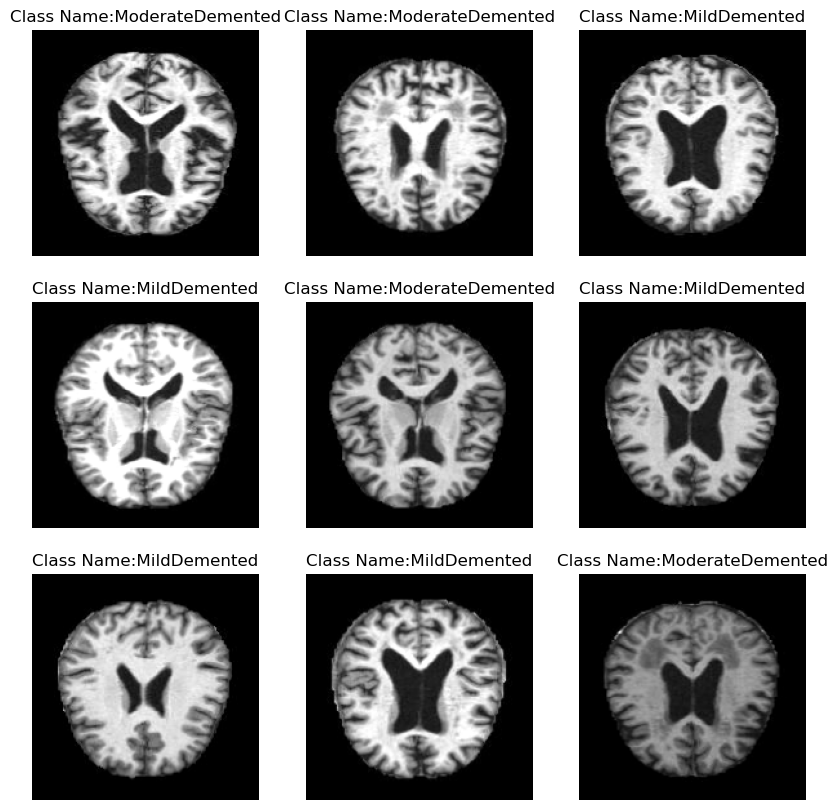

In [6]:
def p_getting():
    m1 = [[0,1], [2, 3]]
    m2 = [[4, 5], [6, 7]]
    res_mat1 = [[0, 0], [0, 0]]

    for i in range(len(m1)):
        for j in range(len(m1[0])):
            res_mat1[i][j] = m1[i][j] - m2[i][j]
x_pos = p_getting()
def display_images(generator,y_pred=None):
  
    labels_dict =dict(zip([0,1,2,3], target))
    
    # get a lot of images
    x,y = generator.next()
    
    # show a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0,50)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class Name:{}".format(labels_dict[np.argmax(y[idx])]))
                                                     
    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual Image:{} \nPredicted Image:{}".format(labels_dict[np.argmax(y[i])],labels[y_pred[i]]))
    
# Display Train Images
display_images(train_dataset)

### 2. b) Checking if the Dataset is Balanced or Not
As, it is evident that the dataset is imbalanced, it may negatively affect how well the machine learning model performs. The model may be biassed towards the majority class (in this case, "NonDemented" and "VeryMildDemented") since the minority classes, in this case "MildDemented" and "ModerateDemented," may be underrepresented in the training data.
Because it has not been thoroughly trained on minority classes, the model may perform poorly in detecting those classes. This can result in ***false positives***, where the model mistakenly labels a healthy brain as having Alzheimer's disease, and ***false negatives***, when the model fails to detect the disease.

#### SOLUTION : 
Several methods, like oversampling minority classes, undersampling majority classes, or combining both, can be used to balance the dataset in order to overcome this problem. Moreover, more sophisticated methods can be employed to produce synthetic data points for the minority classes, such ***SMOTE (Synthetic Minority Over-sampling Technique)***. The model can be trained more successfully and perform better at identifying all classes by balancing the dataset.


In [7]:
data_val = {'NonDemented': 0,
            'VeryMildDemented': 0,
            'MildDemented': 0,
            'ModerateDemented': 0}

# Here we are counting images in each category
for categories in os.listdir(final_path):
    for img in os.listdir(final_path + '/' + categories):
        data_val[categories] = data_val[categories] + 1

# Now we display counts of each class
for category, count in data_val.items():
    print(f"The {category} class has total: {count} images")


The NonDemented class has total: 3200 images
The VeryMildDemented class has total: 2240 images
The MildDemented class has total: 896 images
The ModerateDemented class has total: 64 images


### 2. c)  Verifying the image sizes and quality of the images

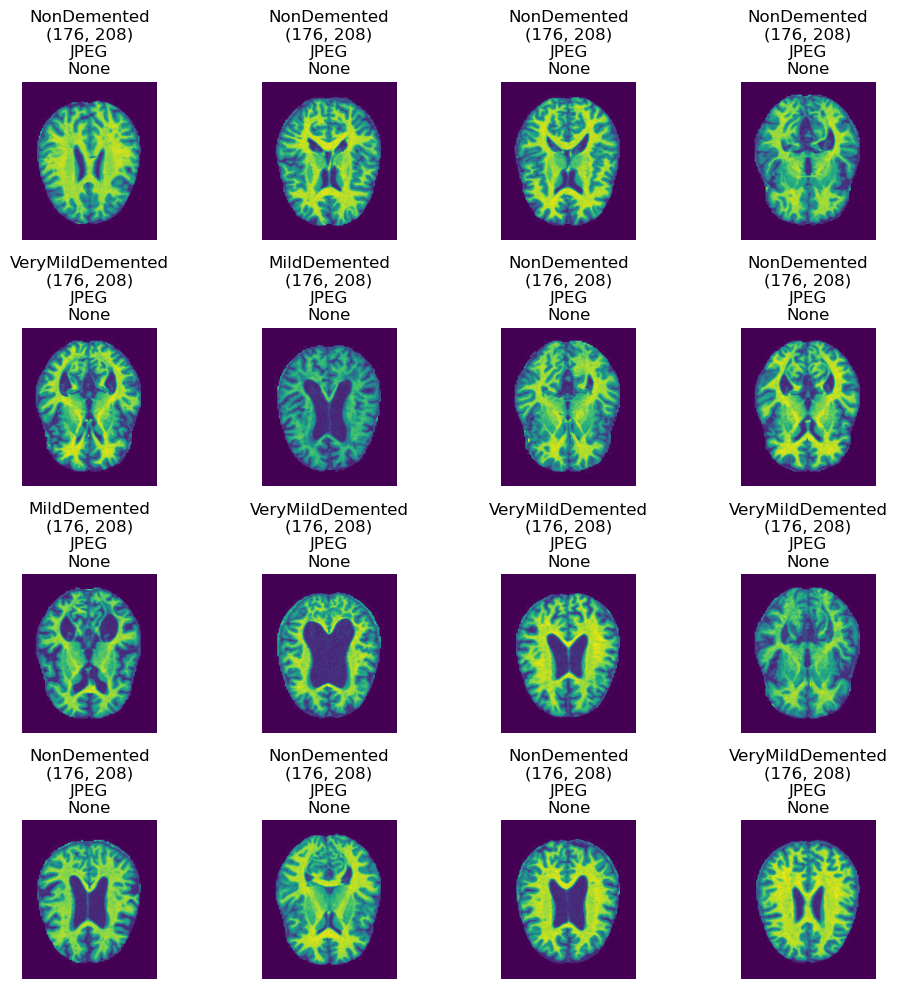

In [8]:
from PIL import Image

# Making a matrix that displays the images and their respective sizes.

fig, ax = plt.subplots(4, 4, figsize=(10, 10))

# Here we want a random sample of 16 images
images = []
categories = []
for category in os.listdir(final_path):
    for image_file in os.listdir(os.path.join(final_path, category)):
        images.append(os.path.join(final_path, category, image_file))
        categories.append(category)

random_images = random.sample(list(zip(images, categories)), 16)

fun = []
for i in range(4):
    fun.append(i+1)

# Displaying the images with their respective sizes.
for i, (image_path, category) in enumerate(random_images):
    with Image.open(image_path) as img:
        row = i // 4
        col = i % 4
        ax[row, col].imshow(img)
        ax[row, col].set_title(f"{category}\n{img.size}\n{img.format}\n{img.info.get('quality')}")
        ax[row, col].axis("off")
        
plt.tight_layout()
plt.show()


### 3. DATA VISUALIZATION:

A typical machine learning challenge is identifying Alzheimer's from brain MRI data. We would be using some potential methods for visualising this kind of dataset:

1. ***Brain heatmap:*** A heatmap can be used to display the relative activity or thickness of various brain areas. Finding the brain regions most impacted by Alzheimer's disease can be helped by this.

2. ***Brain feature scatter plot:*** A scatter plot can be used to show the link between several brain characteristics, such as thickness or degree of activity. As a result, correlations between traits that may be helpful for diagnosing Alzheimer's disease can be found.


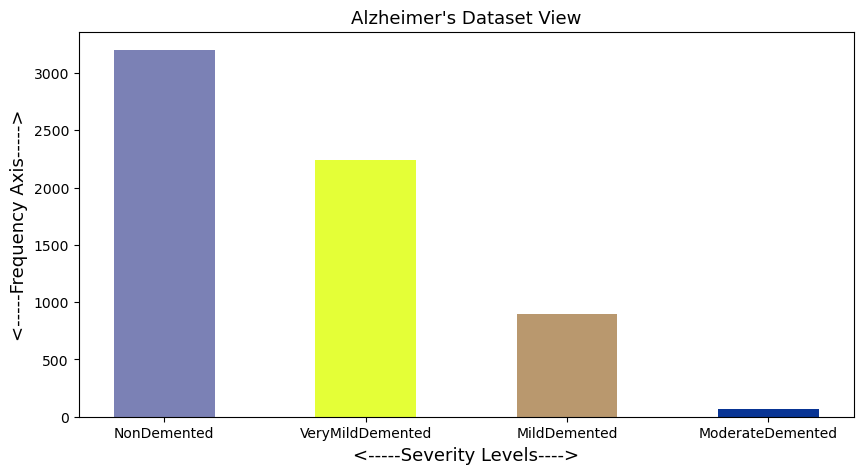

In [9]:
# Initilizing the dataset targets in form of dictionary and their initialised their values to 0
data = {'NonDemented':      0, 
        'VeryMildDemented': 0, 
        'MildDemented':     0,
        'ModerateDemented': 0}

# Dataset Visulization
for categories in os.listdir(final_path):
    for img in os.listdir(final_path + '/' + categories):
        data[categories] = data[categories] + 1

label_list = list(data.keys())
value_list = list(data.values())
        
colors = [(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)) for i in range(len(label_list))]

color_val = colors
ds = 0
for i in range(len(color_val)):
    ds = ds+1
        
# Plotting the bar graph
fig = plt.figure(figsize=(10, 5))
plt.bar(label_list, value_list, color=colors, width=0.5)


nnb = 0

for i in range(3):
    if i < 3:
        nnb = nnb + i

# Adding labels and title to the bar graph
plt.xlabel('<-----Severity Levels---->', fontsize=13)
plt.ylabel('<-----Frequency Axis----->', fontsize=13)
plt.title('Alzheimer\'s Dataset View', fontsize=13)

# Showing the bar graph
plt.show()

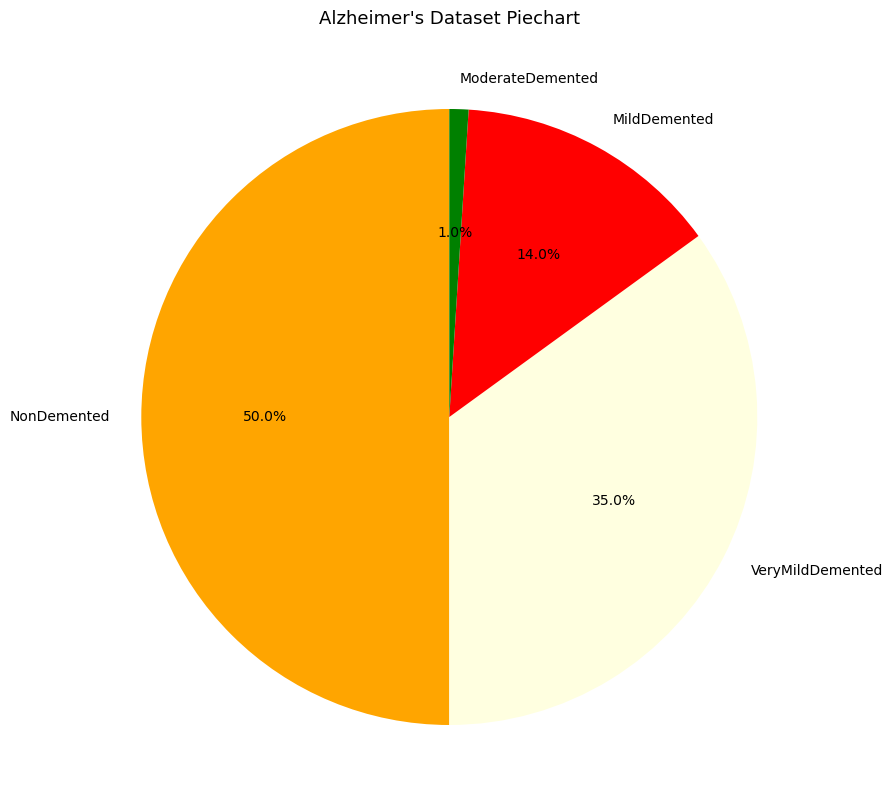

In [10]:
fig = plt.figure(figsize=(20, 10))
# Creating a Pie chart to visualise the dataset
plt.pie(value_list,
        labels = label_list,
        colors=['orange', 'lightyellow', 'red', 'green'],
        startangle=90,
        autopct='%1.1f%%')

# Adding title
plt.title('Alzheimer\'s Dataset Piechart', fontsize=13)

# Showing the piechart of dataset
plt.show()

In [11]:
train_data, train_labels = train_dataset.next()

In [12]:
#------Printing the shape of data
print(train_data.shape, train_labels.shape)

(6400, 176, 176, 3) (6400, 4)


In [13]:
### resampling data

sm = SMOTE(random_state=42)

train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(train_data.shape, train_labels.shape)

(12800, 176, 176, 3) (12800, 4)


### 4. MODEL SELECTION
***The project would be based on the detection of alzheimer's using MRI Scans but also interested in finding models which could perform better than the existing algorithms.***

1. ARTIFICIAL NEURAL NETWORK
2. MODIFIED METHOD



In [14]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

### 4. a) ARTIFICIAL NEURAL NETWORK

In [15]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [176,176,3]),  
keras.layers.Dense(100, activation = 'tanh' ),                               
keras.layers.Dense(200, activation = 'tanh' ),

keras.layers.Dense(200, activation = 'tanh' ),

keras.layers.Dense(200, activation = 'tanh' ),

keras.layers.Dense(200, activation = 'tanh' ),
keras.layers.Dense(4, activation = 'tanh')])

2023-05-04 16:33:54.844451: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-04 16:33:54.844663: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/bhartrihari/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-04 16:33:54.844742: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/bhartrihari/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-04 16:33:54.844802: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Co

In [16]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [17]:
'''Using Keras' "Adam Optimizer" which is a popular
optimization algorithm used for training deep
neural networks'''

model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.AUC(name='auc')])

In [18]:
#------Checking the result for this model
result = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=50)

Epoch 1/50


2023-05-04 16:33:55.273614: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 3045064704 exceeds 10% of free system memory.


256/256 [==============================] - 42s 161ms/step - loss: 4.6694 - auc: 0.4998 - val_loss: 4.4667 - val_auc: 0.4964
Epoch 2/50
256/256 [==============================] - 41s 160ms/step - loss: 4.5156 - auc: 0.4985 - val_loss: 4.4666 - val_auc: 0.4964
Epoch 3/50
256/256 [==============================] - 41s 161ms/step - loss: 4.5155 - auc: 0.4985 - val_loss: 4.4666 - val_auc: 0.4964
Epoch 4/50
256/256 [==============================] - 41s 160ms/step - loss: 4.5155 - auc: 0.4985 - val_loss: 4.4665 - val_auc: 0.4964
Epoch 5/50
256/256 [==============================] - 41s 159ms/step - loss: 4.5155 - auc: 0.4985 - val_loss: 4.4665 - val_auc: 0.4964
Epoch 6/50
256/256 [==============================] - 41s 160ms/step - loss: 4.5155 - auc: 0.4985 - val_loss: 4.4665 - val_auc: 0.4964
Epoch 7/50
256/256 [==============================] - 41s 161ms/step - loss: 4.5155 - auc: 0.4985 - val_loss: 4.4665 - val_auc: 0.4964
Epoch 8/50
256/256 [==============================] - 41s 160ms/st

### MODEL EVALUATION

In [19]:
loss, accuracy = model.evaluate(test_data, test_labels)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

80/80 [==============================] - 1s 7ms/step - loss: 8.0653 - auc: 0.4997
Loss:  8.065345764160156
Accuracy:  0.49973955750465393


### MODEL 2:

In [20]:
#Set up the environment and upload the data
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep 
from tqdm.notebook import tqdm
import os
sns.set()

In [21]:
#A dataset that is associated with the label of Alzheimer's disease.

#path=r'C:\Users\prgya\Documents\Capstone\alzhei#mers\dataset'
path=r'/home/bhartrihari/Capstone/Alzheimer_s Dataset/dataset'

very_mild = glob(path+r'/VeryMildDemented/*')

mild = glob(path+r'/MildDemented/*')
moderate = glob(path+r'/ModerateDemented/*')

# Dataset that dont have Alzheimer
non =glob(path+r'/NonDemented/*')

### Non-Demented

/home/bhartrihari/Capstone/Alzheimer_s Dataset/dataset/NonDemented/nonDem2043.jpg
The data or image in Non Alzheimer Folder is as: 
Image shape:(208, 176)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

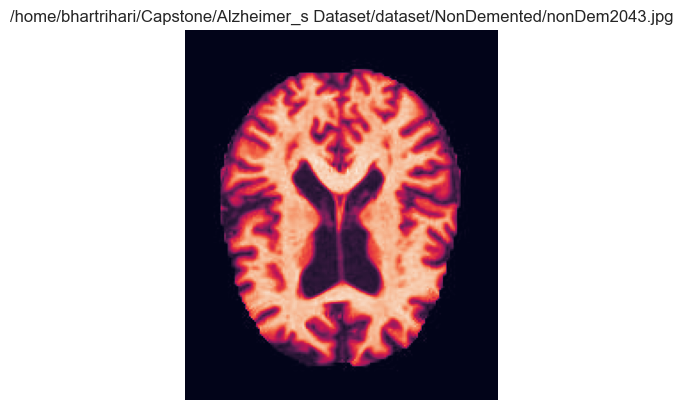

In [22]:
print(non[0])

def image_viewer(directory):
    img_sel = mpimg.imread(directory)
    plt.imshow(img_sel)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img_sel.shape}')
    return img_sel

print('The data or image in Non Alzheimer Folder is as: ')
image_viewer(non[0])

### Person having Alzheimer's (Moderate)

The brain of Alzheimer Patient's
Image shape:(208, 176)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

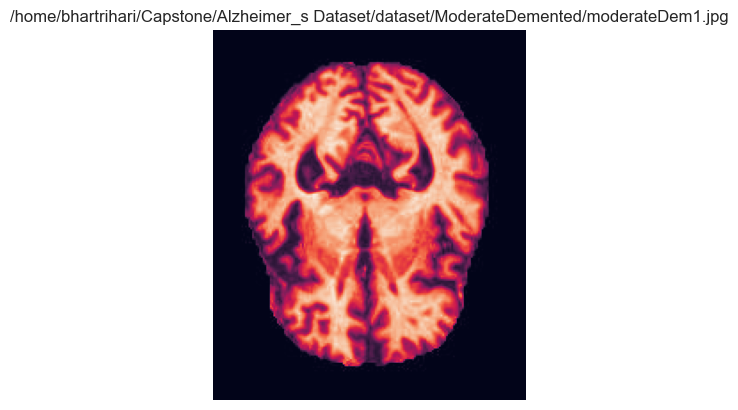

In [23]:
# Displaying the array and the image of Moderate Alzheimer's person
print('The brain of Alzheimer Patient\'s')
image_viewer(moderate[1])

### PRINCIPAL COMPONENT ANALYSIS

In [24]:
#Here we are extracting the features
def extracting_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalizing the pixel values of b/w 0 to 1
    img = resize(img, (128, 128, 3))  # converting all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

extractor={1:0, 2:0, 3:0, 4:0}
acc=0 
for i in range(1,4):
    acc=acc+extractor[i]

non_ALZ = [extracting_feature(filename) for filename in non]
vmild_ALZ = [extracting_feature(filename) for filename in very_mild]
mild_ALZ = [extracting_feature(filename) for filename in mild]
moderate_ALZ = [extracting_feature(filename) for filename in moderate]
ALZ = vmild_ALZ + mild_ALZ + moderate_ALZ


In [25]:
# Here Preparing Data for PCA [Principal Component Analysis]
all_data = np.concatenate((np.array(non_ALZ),np.array(ALZ)))
print(all_data)
all_data = all_data.reshape(all_data.shape[0], np.product(all_data.shape[1:]))

scaler = StandardScaler()
scaler.fit(all_data)

# Now data is standarised for mean = 0 and variance =1 i.e."Standard Normal"
X = scaler.transform(all_data)


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Number of components explaining 80% variance: 158
[[-17.11345319 -10.55622889  -0.96327844 ...   0.23369347  -1.42905944
   -0.94505498]
 [-18.13267521  -8.49617931   2.59891293 ...  -0.04483851  -0.40062455
    0.4631199 ]
 [-12.57269634  -1.99981856  14.54381258 ...   1.04148694   0.23584928
    0.56291892]
 ...
 [  7.55901077   1.33599647 -16.84417191 ...   0.55759641  -0.67917101
    0.85127738]
 [  6.8892283   21.99997661  16.44633712 ...   0.70264685  -0.61234896
   -0.41252112]
 [ -7.47624065  10.00719863 -13.68234496 ...  -1.6911809    1.22185514
   -0.70180237]]


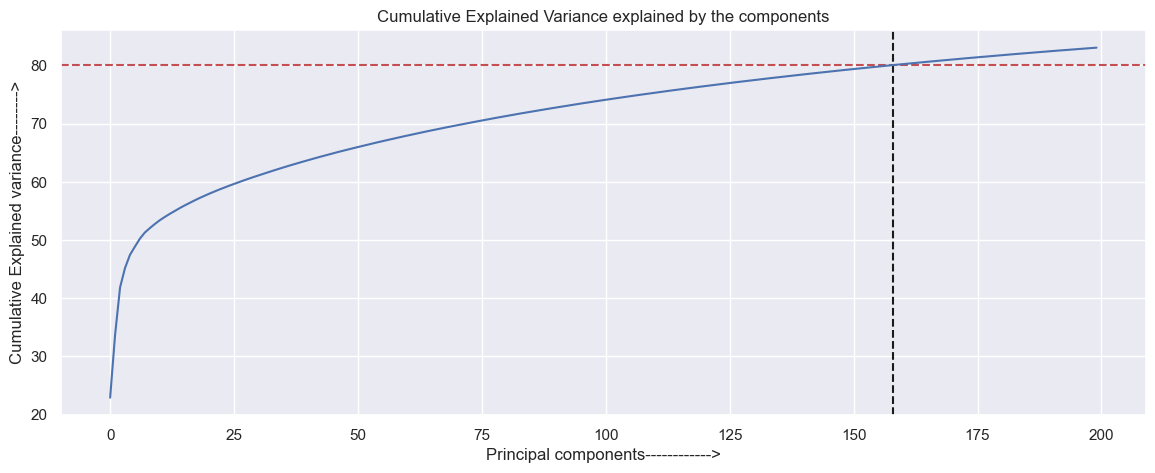

In [28]:
# Splitting the data 
from sklearn.model_selection import train_test_split
y = [0] * len(non_ALZ) + [1] * len(ALZ)
X_train, X_test, y_train, y_test = train_test_split(all_data, y, test_size=0.2)

scala = preprocessing.StandardScaler()

# Compressing the images into two dimensions using PCA
pca = decomposition.PCA(200)
X_proj = pca.fit_transform(X_train)

# Finding the cummulative sum of explained variance ratio
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100 #100 is multiplied for percentage
 
# Checking how many PCs explain 90% of the variance?
k = np.argmax(var_cumu>80)
print("Number of components explaining 80% variance: "+ str(k))
 
plt.figure(figsize=[14,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance-------->')
plt.xlabel('Principal components------------>')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=80, color="r", linestyle="--")
ax = plt.plot(var_cumu)

print(X_proj)

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train_LDA = lda.fit_transform(X_train, y_train)
X_test_LDA = lda.transform(X_test)
accuracy = lda.score(X_test, y_test)
print(accuracy*100, '% accuracy (testing data)' )
accuracy_train = lda.score(X_train, y_train)
print(accuracy_train*100, '% accuracy (training data)')

93.671875 % accuracy (testing data)
100.0 % accuracy (training data)


### SVM for Alzheimer Detection

In [30]:
# Making a list to store the arrays here
resized_image_array=[]
# List that stores the array labels 
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def image_resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)
acx = 10
def neu(acx):
    a=1
    for i in range(1,10):
        if acx >=0:
            a = a*acx
            acx = acx-1
    return a

ALZ = very_mild + mild + moderate
image_resizer(non)
image_resizer(ALZ)

In [31]:
print("The Length of non is as: ",len(non))
print("The length of alz is as: ",len(ALZ))
print("The Lenght of the resized array is: ",len(resized_image_array))
print(resized_image_array[1])

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

The Length of non is as:  3200
The length of alz is as:  3200
The Lenght of the resized array is:  6400
[0 0 0 ... 0 0 0]


### SVM Linear Detection (98% accuracy)

In [32]:
# Training the SVM linear kernel 
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)
y_pred = clf.predict(train_x)
y_true = train_y

# Getting the performance of the SVM linear kernel on Training Phase
print('Accuracy value on Training Data is : ', metrics.accuracy_score(y_true, y_pred))
print('Precision value on Training Data is : ', metrics.precision_score(y_true, y_pred))
print('Recall value on Training Data is : ', metrics.recall_score(y_true, y_pred))
print('f1 value on Training Data is : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix is :', metrics.confusion_matrix(y_true, y_pred)) 


Accuracy value on Training Data is :  1.0
Precision value on Training Data is :  1.0
Recall value on Training Data is :  1.0
f1 value on Training Data is :  1.0
Confusion matrix is : [[2570    0]
 [   0 2550]]


In [33]:
# Using SVM linear kernel for prediction
y_pred = clf.predict(test_x)
y_true = test_y

# Getting the performance of the SVM linear kernel on Testing Phase
print('Accuracy value on Test Data is : ', metrics.accuracy_score(y_true, y_pred))
print('Precision value of Test Data is : ', metrics.precision_score(y_true, y_pred))
print('Recall value on Test Data is : ', metrics.recall_score(y_true, y_pred))
print('f1-score on Test Data is : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix is :', metrics.confusion_matrix(y_true, y_pred))

Accuracy value on Test Data is :  0.984375
Precision value of Test Data is :  0.9906542056074766
Recall value on Test Data is :  0.9784615384615385
f1-score on Test Data is :  0.9845201238390093
Confusion matrix is : [[624   6]
 [ 14 636]]


SVM WITH "Polynomial" Kernel

In [34]:
# Training the SVM with "Polynomial" kernel with Degree 2
clf = svm.SVC(kernel = 'poly', degree = 2)
clf.fit(train_x, train_y)

# Storing the values of predicted and true values
y_pred = clf.predict(train_x)
y_true = train_y

# Displaying metrics for the training dataset.
print('Accuracy on Training data: ', metrics.accuracy_score(y_true, y_pred))
print('Precision on Training data: ', metrics.precision_score(y_true, y_pred))
print('Recall on Training data: ', metrics.recall_score(y_true, y_pred))
print('f1 score on Training data: ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))


Accuracy on Training data:  0.89921875
Precision on Training data:  0.8905529953917051
Recall on Training data:  0.9094117647058824
f1 score on Training data:  0.89988358556461
Confusion matrix : [[2285  285]
 [ 231 2319]]


In [35]:
# Predicting with the Test Dataset
y_pred = clf.predict(test_x)
y_true = test_y

# Perfomance analysis with Test Data
print('Accuracy on Test data: ', metrics.accuracy_score(y_true, y_pred))
print('Precision on Test data: ', metrics.precision_score(y_true, y_pred))
print('Recall on Test data: ', metrics.recall_score(y_true, y_pred))
print('f1-score on Test data : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy on Test data:  0.8515625
Precision on Test data:  0.8549382716049383
Recall on Test data:  0.8523076923076923
f1-score on Test data :  0.8536209553158707
Confusion matrix : [[536  94]
 [ 96 554]]


SVM using "RBF" modle

In [36]:
# Training SVM using "RBF" kernel
clf = svm.SVC(kernel = 'rbf')
clf.fit(train_x, train_y)


SVC()

In [37]:
# Storing the prediction value
y_pred = clf.predict(train_x)
y_true = train_y

# Displaying the data on Training data
print('Accuracy of train data : ', metrics.accuracy_score(y_true, y_pred))
print('Precision of train data : ', metrics.precision_score(y_true, y_pred))
print('Recall of train data : ', metrics.recall_score(y_true, y_pred))
print('f1-score of train data : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy of train data :  0.869140625
Precision of train data :  0.851270553064275
Recall of train data :  0.8933333333333333
f1-score of train data :  0.8717948717948717
Confusion matrix : [[2172  398]
 [ 272 2278]]


In [39]:
# Predicting the data on Test values
y_pred = clf.predict(test_x)
y_true = test_y

# Displaying the results for test data
print('Accuracy of test data : ', metrics.accuracy_score(y_true, y_pred))
print('Precision of test data : ', metrics.precision_score(y_true, y_pred))
print('Recall of test data : ', metrics.recall_score(y_true, y_pred))
print('f1-score : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy of test data :  0.81640625
Precision of test data :  0.8110944527736131
Recall of test data :  0.8323076923076923
f1-score :  0.8215641609719058
Confusion matrix : [[504 126]
 [109 541]]


### CNN model for Alzheimer Classifier (EfficientNetB0)

In [40]:
import tensorflow as tf

data=r'/home/bhartrihari/Capstone/Alzheimer_s Dataset/dataset'

# To create a Training and Test dataset from a directory of image files using Tensorflow Keras
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data,
    labels = 'inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=42,
    color_mode='grayscale',
    image_size=(128,128),
    batch_size=32,
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    data,
    labels = 'inferred',
    label_mode='categorical',
    validation_split= 0.2,
    subset="validation",
    seed=42,
    color_mode= 'grayscale',
    image_size = (128,128),
    batch_size=32,
)


Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


16705208/16705208 [==============================] - 7s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 1)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 4,012,672
Non-trainable params: 42,023
_________________________________________________________________
40/40 [==============================] - 10s 25

[5.983694076538086, 0.17499999701976776]

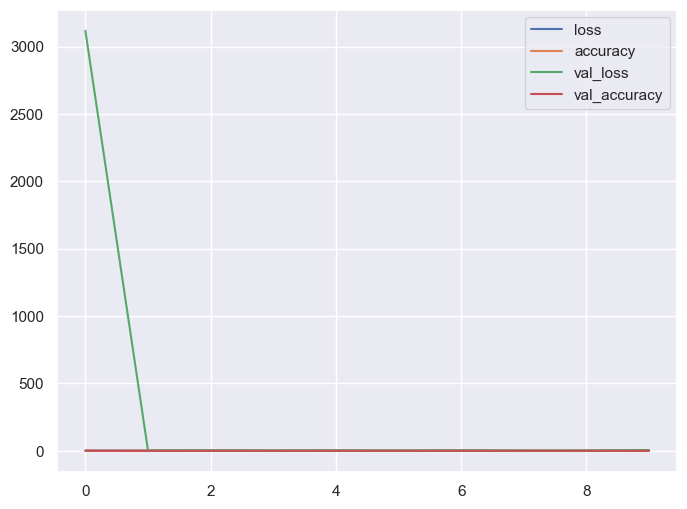

In [41]:

# Setting up the model
EffNet = tf.keras.applications.EfficientNetB0(include_top = False)
EffNet.trainable = True
inputs = tf.keras.layers.Input(shape=((128,128) + (1,)), name = 'input_layer')
x = EffNet(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(4, activation = 'softmax', name='output_layer')(x)
model = tf.keras.Model(inputs, outputs)
Learning_Rate = 0.1 # Seedhe daal do ise
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = Learning_Rate), metrics=['accuracy'])
model.summary()

# Model Training
graphs = model.fit(train_data, validation_data = test_data, epochs = 10, verbose = False)
pd.DataFrame(graphs.history).plot(figsize=(8,6))

# Evaluating the model 
model.evaluate(test_data)

Below code defines a convolutional neural network (CNN) using the EfficientNetB0 pre-trained model as a feature extractor. The code first loads the pre-trained EfficientNetB0 model without the last classification layer (include_top=False). The trainable parameter is set to True, indicating that the weights of the EfficientNetB0 model will be updated during training.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 1)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 4,012,672
Non-trainable params: 42,023
_________________________________________________________________
40/40 [==============================] - 10s 251ms/step - loss: 0.8571 - accuracy: 0.7812


[0.8570607304573059, 0.78125]

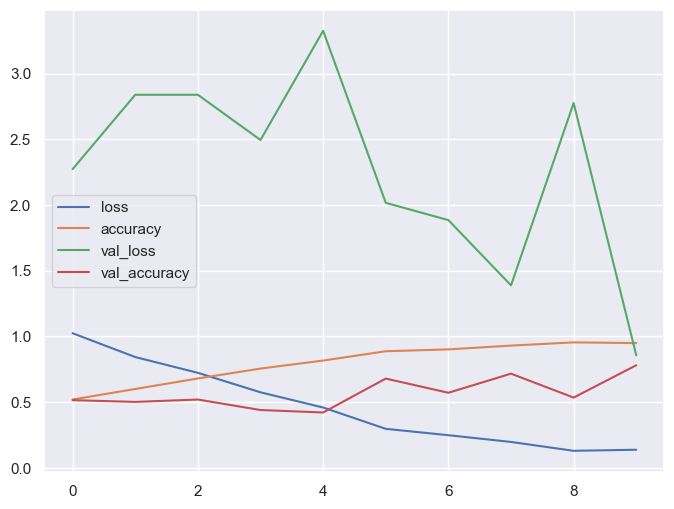

In [42]:
# Model when learning rate is changed

EffNet1 = tf.keras.applications.EfficientNetB0(include_top = False)
EffNet1.trainable = True
inputs = tf.keras.layers.Input(shape=((128,128) + (1,)), name = 'input_layer')
x = EffNet1(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(4, activation = 'softmax', name='output_layer')(x)
model = tf.keras.Model(inputs, outputs)
Learning_Rate = 0.01
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = Learning_Rate), metrics=['accuracy'])
model.summary()

# Model Training
graphs = model.fit(train_data, validation_data = test_data, epochs = 10, verbose = False)
pd.DataFrame(graphs.history).plot(figsize=(8,6))

# Performance Checking
model.evaluate(test_data)

### WHY TRYING WITH BETTER?


From the above, the performance of the existing code(https://www.kaggle.com/code/gonzalorecioc/alzheimer-brain-mri-classifier-effnetb0-99-acc) had 99% accuracy. But actually, having a different seed, the accuracy drops significantly to 58% with learning rate of 0.1 and 85% with learning rate of 0.01. No other fundamental changes in the code exists when it comes to learning rate of 0.01.

However, since there was 99% accuracy, there should be a way to boost the accuracy to at least 90%. The reason for having low accuracy may be the issue that the shape of the given data input is 128x128 rather than 224x224, which is the input that is expected for EfficientNetB0.

So, in below, I will resize the image and try running CNN again with the changed size.

In [43]:
# Again making the training and testing dataset for EfficientNetB0

training_dataset1 = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=True
)

testing_dataset1 = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=True
)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [44]:
# Setting up the model EfficientNetB0

EffNet2 = tf.keras.applications.EfficientNetB0(include_top = False)
EffNet2.trainable = True
inputs = tf.keras.layers.Input(shape=((224,224) + (1,)), name = 'input_layer')
x = EffNet2(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(4, activation = 'softmax', name='output_layer')(x)
model = tf.keras.Model(inputs, outputs)
Learning_Rate = 0.01
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = Learning_Rate), metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 1)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 4,012,672
Non-trainable params: 42,023
_________________________________________________________________


40/40 [==============================] - 31s 766ms/step - loss: 15.1272 - accuracy: 0.5133


[15.127240180969238, 0.5132812261581421]

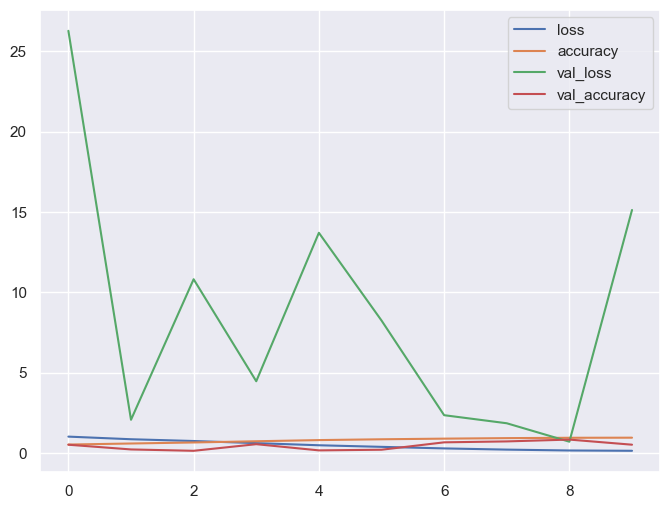

In [45]:
# Training the model 
graphs = model.fit(training_dataset1, validation_data = testing_dataset1, epochs = 10, verbose = False)
pd.DataFrame(graphs.history).plot(figsize=(8,6))

# Model checking
model.evaluate(testing_dataset1)

*USING DENSENET169 [A CNN Based Model]*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
#from skimage.color import grey2rgb

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Now we perform Data Augmentation. Data augmentation is a technique used to artificially expand the size of a dataset by creating modified copies of the existing images or samples. The purpose of data augmentation is to prevent overfitting and improve model generalization by providing more variety to the training set.

The addition of variations in the training data allows the model to learn more features and robustness in the data, rather than memorizing specific features present in the training data. Moreover, data augmentation is especially useful when the size of the training set is small, as it can create new data points that can help the model learn better.

Common data augmentation techniques include image flipping, rotation, zooming, scaling, cropping, changing brightness and contrast, and adding noise.

In [5]:
# Generating dataset for Test and Train

train_datagenerator = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

valid_datagenerator = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagenerator  = ImageDataGenerator(rescale = 1./255)


In [6]:
#path = r'C:/Users/prgya/Documents/Capstone/alzheimers/'
path = r'/home/bhartrihari/Capstone/Alzheimer_s Dataset/'
os.chdir(path)
print("The current working directory is as : ",os.getcwd())
print("The contents are listed as : ", os.listdir())

The current working directory is as :  /home/bhartrihari/Capstone/Alzheimer_s Dataset
The contents are listed as :  ['test', 'best_weights.hdf5', 'train', 'dataset']


In [7]:
train_dataset  = train_datagenerator.flow_from_directory(directory = path+'/train',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 128)

Found 4098 images belonging to 4 classes.


In [8]:
valid_dataset = valid_datagenerator.flow_from_directory(directory = path+'/train',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 128)

Found 1023 images belonging to 4 classes.


100%|██████████| 5/5 [00:25<00:00,  5.17s/it]


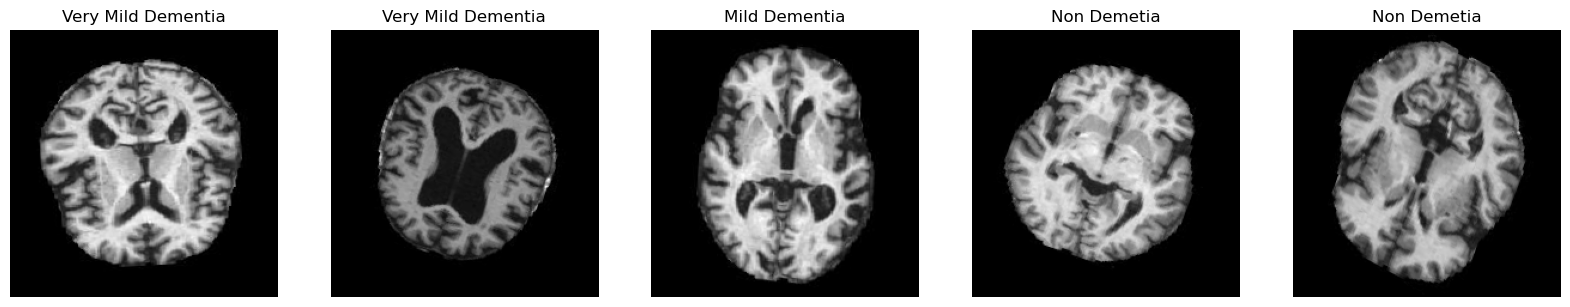

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(20,20))

for i in tqdm(range(0,5)):
    rand1 = np.random.randint(len(train_dataset))
    rand2 = np.random.randint(100)
    ax[i].imshow(train_dataset[rand1][0][rand2])
    ax[i].axis('off')
    a = train_dataset[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Demetia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')

PREPARING THE MODEL 

In [10]:
# Initializing the model

base_model = DenseNet169(input_shape=(224,224,3), 
                         include_top=False,
                         weights="imagenet")

2023-05-06 11:33:50.822878: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-06 11:33:50.823663: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-06 11:33:50.823978: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-05-06 11:33:50.824296: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-05-06 11:33:50.824474: W tensorflow/c

Freezing the layers of a pre-trained neural network. When a layer is frozen, its weights and biases are not updated during the training process. This is useful when we want to use a pre-trained model as a feature extractor and add a new layer on top to solve a different task

In [11]:
for layer in base_model.layers:
    layer.trainable=False

In [12]:
# Model Building

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

Printing the summary of Model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 dropout (Dropout)           (None, 7, 7, 1664)        0         
                                                                 
 flatten (Flatten)           (None, 81536)             0         
                                                                 
 batch_normalization (BatchN  (None, 81536)            326144    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2048)              166987776 
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                        

In [14]:
# Model Compile 
OPT    = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              metrics=[tensorflow.keras.metrics.AUC(name = 'auc')],
              optimizer=OPT)

In [15]:
# Here callbacks are defined

filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' ,
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [16]:
# Making the model for 50 epocs only

model_history=model.fit(train_dataset,
                        validation_data=valid_dataset,
                        epochs = 50,
                        callbacks = callback_list,
                        verbose = 1)


Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 1.3001 - auc: 0.7955 
Epoch 1: val_auc improved from -inf to 0.69216, saving model to ./best_weights.hdf5
33/33 [==============================] - 545s 16s/step - loss: 1.3001 - auc: 0.7955 - val_loss: 3.0479 - val_auc: 0.6922
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 1.0887 - auc: 0.8288 
Epoch 2: val_auc improved from 0.69216 to 0.73685, saving model to ./best_weights.hdf5
33/33 [==============================] - 507s 15s/step - loss: 1.0887 - auc: 0.8288 - val_loss: 2.1733 - val_auc: 0.7368
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 0.9734 - auc: 0.8544 
Epoch 3: val_auc did not improve from 0.73685
33/33 [==============================] - 461s 14s/step - loss: 0.9734 - auc: 0.8544 - val_loss: 1.8523 - val_auc: 0.6946
Epoch 4/50
33/33 [==============================] - ETA: 0s - loss: 0.9146 - auc: 0.8639 
Epoch 4: val_auc improved from 0.73685 to 0.79151, saving mo

In [17]:
# For 100 epocs

# model_history=model.fit(train_dataset,
#                         validation_data=valid_dataset,
#                         epochs = 100,
#                         callbacks = callback_list,
#                         verbose = 1)


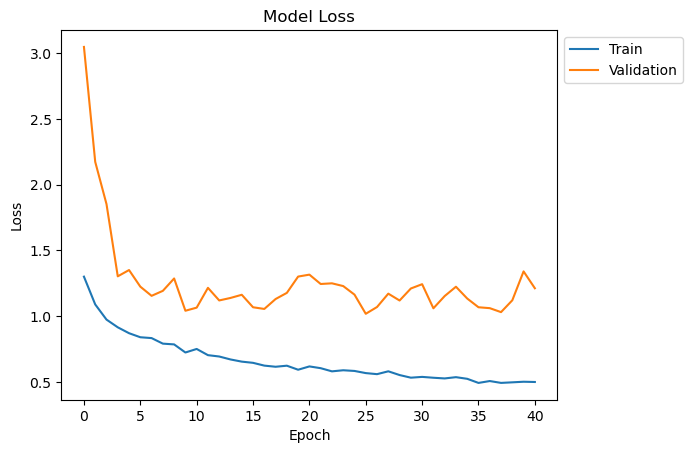

In [18]:
# Summary for Model Loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

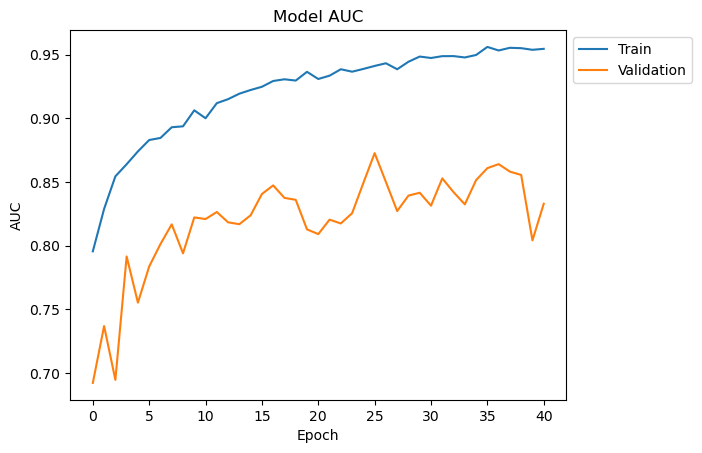

In [19]:
# Summarize history for loss

plt.plot(model_history.history['auc'])
plt.plot(model_history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [21]:
# Test Data 

test_dataset  = test_datagenerator.flow_from_directory(directory = path+'/test',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 128)

Found 1279 images belonging to 4 classes.


In [22]:
# Evaluating Loss and AUC

model.evaluate(test_dataset)

10/10 [==============================] - 116s 12s/step - loss: 0.8911 - auc: 0.8908


[0.891100287437439, 0.8908141851425171]

In [23]:
# Saving the model

from tensorflow.keras.models import save_model

model_path = '/home/bhartrihari/Capstone/Saved-Final-Models/densenet169.h5'

save_model(model,model_path)

# Ab kyuki mene model yha save kia hai to isiko mereko "Backend" me use kra hai.

1/1 [==============================] - 6s 6s/step
76.26 % chances are there that the image is NonDemented


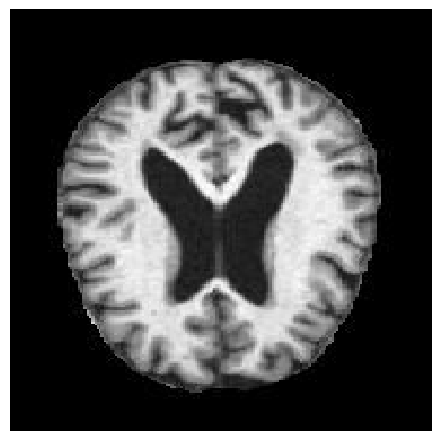

In [24]:
"THIS IS TEST FOR NON-DEMENTIA"

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/home/bhartrihari/Capstone/Alzheimer_s Dataset/test/NonDemented/26.jpg', target_size=(224, 224))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img, axis=0)

# Make predictions
predictions = model.predict(img)
predicted_class_index = np.argmax(predictions, axis=1)[0]
probability = round(np.max(predictions) * 100, 2)
predicted_class_label = idc[predicted_class_index]

print(probability, '% chances are there that the image is', predicted_class_label)


1/1 [==============================] - 0s 251ms/step
66.53 % chances are there that the image is MildDemented


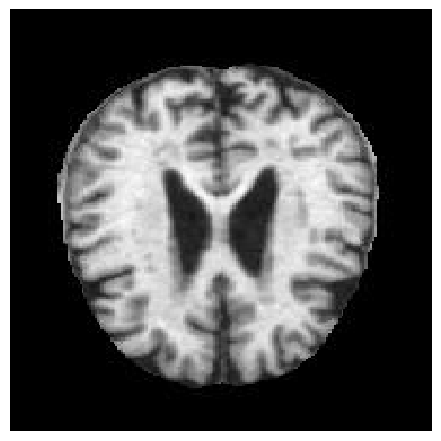

In [25]:
'''Test Case 2: Mild Demented ''' 
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/home/bhartrihari/Capstone/Alzheimer_s Dataset/test/MildDemented/32.jpg', target_size=(224, 224))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img, axis=0)

# Make predictions
predictions = model.predict(img)
predicted_class_index = np.argmax(predictions, axis=1)[0]
probability = round(np.max(predictions) * 100, 2)
predicted_class_label = idc[predicted_class_index]

print(probability, '% chances are there that the image is MildDemented')

1/1 [==============================] - 0s 256ms/step
62.12 % chances are there that the image is ModerateDemented


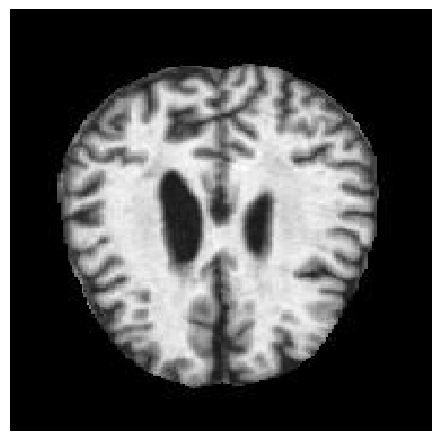

In [26]:
''' Test Case 3: Moderate Demented '''

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/home/bhartrihari/Capstone/Alzheimer_s Dataset/test/ModerateDemented/32.jpg', target_size=(224, 224))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img, axis=0)

# Make predictions
predictions = model.predict(img)
predicted_class_index = np.argmax(predictions, axis=1)[0]
probability = round(np.max(predictions) * 100, 2)
predicted_class_label = idc[predicted_class_index]

print(probability, '% chances are there that the image is ModerateDemented')



1/1 [==============================] - 0s 249ms/step
59.5 % chances are there that the image is Very Mild Demented


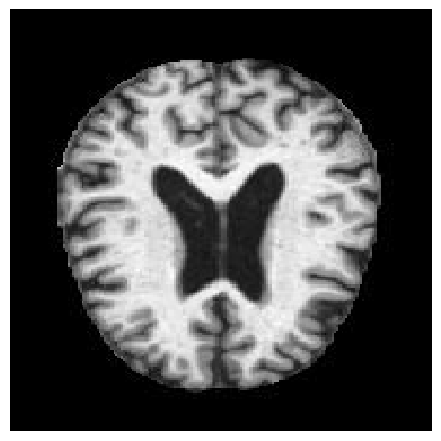

In [27]:
'''TEST FOR VERY-MILD-DEMETIA'''

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/home/bhartrihari/Capstone/Alzheimer_s Dataset/test/VeryMildDemented/26.jpg', target_size=(224, 224))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img, axis=0)

# Make predictions
predictions = model.predict(img)
predicted_class_index = np.argmax(predictions, axis=1)[0]
probability = round(np.max(predictions) * 100, 2)
predicted_class_label = idc[predicted_class_index]

print(probability, '% chances are there that the image is Very Mild Demented')

# TESTING for some random images again 100 epocs

1/1 [==============================] - 0s 256ms/step
99.87 % chances are there that the image is NonDemented


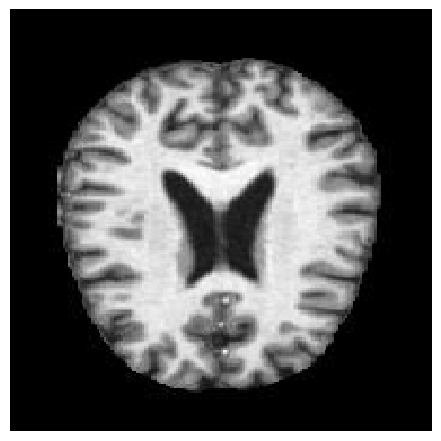

In [28]:
#-----------------TEST CASE 1: FOR NON-DEMENTED--------------------------

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/home/bhartrihari/Capstone/Alzheimer_s Dataset/test/NonDemented/26 (100).jpg', target_size=(224, 224))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img, axis=0)

# Make predictions
predictions = model.predict(img)
predicted_class_index = np.argmax(predictions, axis=1)[0]
probability = round(np.max(predictions) * 100, 2)
predicted_class_label = idc[predicted_class_index]

print(probability, '% chances are there that the image is', predicted_class_label)


1/1 [==============================] - 0s 245ms/step
89.44 % chances are there that the image is MildDemented


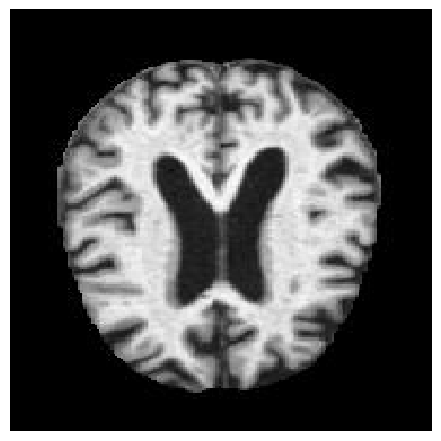

In [29]:
#----------------------------------------Test Case 2: Mild Demented-----------------------------

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/home/bhartrihari/Capstone/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg', target_size=(224, 224))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img, axis=0)

# Make predictions
predictions = model.predict(img)
predicted_class_index = np.argmax(predictions, axis=1)[0]
probability = round(np.max(predictions) * 100, 2)
predicted_class_label = idc[predicted_class_index]

#print(probability, '% chances are there that the image is', predicted_class_label)
print(probability, '% chances are there that the image is MildDemented')

1/1 [==============================] - 0s 264ms/step
97.37 % chances are there that the image is ModerateDemented


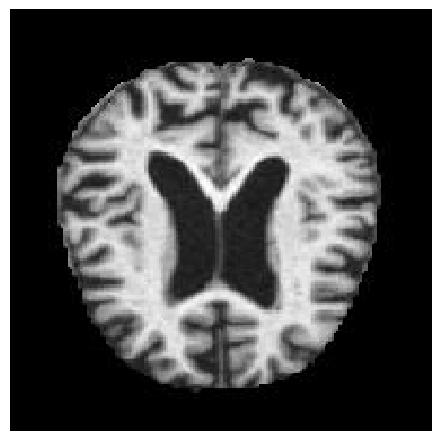

In [31]:
#-------------------------------------Test Case 3: Moderate Demented---------------------------------

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/home/bhartrihari/Capstone/Alzheimer_s Dataset/test/ModerateDemented/27 (2).jpg', target_size=(224, 224))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img, axis=0)

# Make predictions
predictions = model.predict(img)
predicted_class_index = np.argmax(predictions, axis=1)[0]
probability = round(np.max(predictions) * 100, 2)
predicted_class_label = idc[predicted_class_index]

#print(probability, '% chances are there that the image is', predicted_class_label)
print(probability, '% chances are there that the image is ModerateDemented')



1/1 [==============================] - 0s 256ms/step
93.52 % chances are there that the image is Very Mild Demented


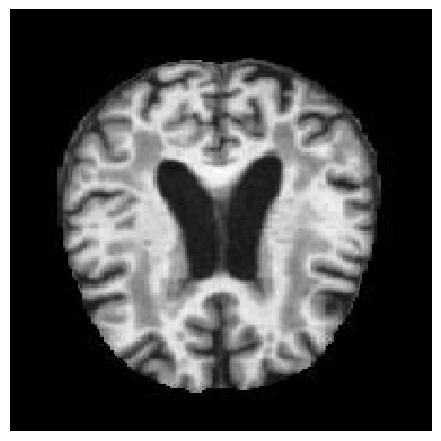

In [30]:
#------------------------------------------TEST CASE 4: FOR VERY-MILD-DEMETIA-----------------------------

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/home/bhartrihari/Capstone/Alzheimer_s Dataset/test/VeryMildDemented/26 (55).jpg', target_size=(224, 224))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img, axis=0)

# Make predictions
predictions = model.predict(img)
predicted_class_index = np.argmax(predictions, axis=1)[0]
probability = round(np.max(predictions) * 100, 2)
predicted_class_label = idc[predicted_class_index]

#print(probability, '% chances are there that the image is', predicted_class_label)
print(probability, '% chances are there that the image is Very Mild Demented')